n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |       10 |      4 |  0.000000E+00 |  0.7526881720 |             - |             -
     2 |       13 |      6 |  0.000000E+00 |  0.000000E+00 |  0.2222222222 |         nadir
     3 |       16 |      5 |  0.000000E+00 |  0.000000E+00 |  0.2857142857 |         nadir
     4 |       19 |      5 |  0.000000E+00 |  0.000000E+00 |  4.0000000000 |         nadir
     5 |       22 |      5 |  0.000000E+00 |  0.000000E+00 |  0.000000E+00 |             f
     6 |       25 |      6 |  0.000000E+00 |  0.000000E+00 |  0.1666666667 |         ideal
     7 |       28 |      8 |  0.000000E+00 |  0.000000E+00 |  0.1078239010 |             f
     8 |       31 |      9 |  0.000000E+00 |  0.000000E+00 |  0.0555555556 |         ideal
     9 |       34 |     10 |  0.000000E+00 |  0.000000E+00 |  0.2000000000 |         ideal
    10 |       37 |     10 |  0.000000E+00 |  0.000000E+00 |  0.0481937232 |             f

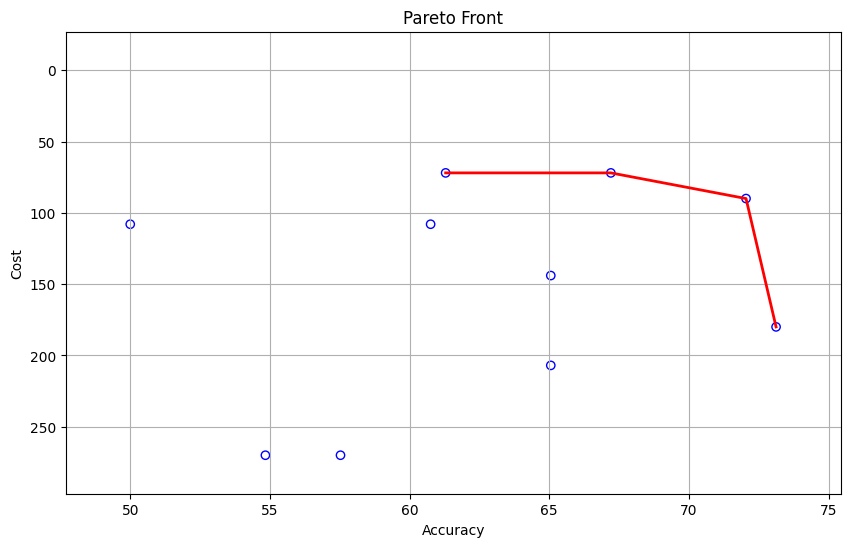

{'all':    layers_amount  hidden_height  input_bitwidth  hidden_bitwidth  \
 0              2              7               3                2   
 1              3              2               5                2   
 2              2              2               6                9   
 3              3              3               7                9   
 4              2              7               2                2   
 5              2              6               8                2   
 6              2              3               4                2   
 7              2              4               3                3   
 8              2              3               6                9   
 9              3              4               5                2   
 
    learning_rate quantization_mode   accuracy  cost  
 0          0.010       QMode.STOCH  72.043011    90  
 1          0.010       QMode.STOCH  61.290323    72  
 2          0.100       QMode.STOCH  54.838710   270  
 3          

In [2]:
from src.datasets.vertebral_dataset import VertebralDataset
from src.nas.mlp_nas_problem import NASParams
from src.nas.tooling import run_NAS_pipeline


nas_params = NASParams(
    min_accuracy=50,
    amount_of_evaluations=3,
    population_size=10,
    population_offspring_count=3,
    epochs=10,
)
vertebral_pf = run_NAS_pipeline(VertebralDataset, nas_params, n_gen=15)
vertebral_pf
